### Import Libraries

In [1]:
import re
import cv2 
import numpy as np 
import pytesseract 
from pytesseract import Output
import matplotlib.pyplot as plt

### Load Image

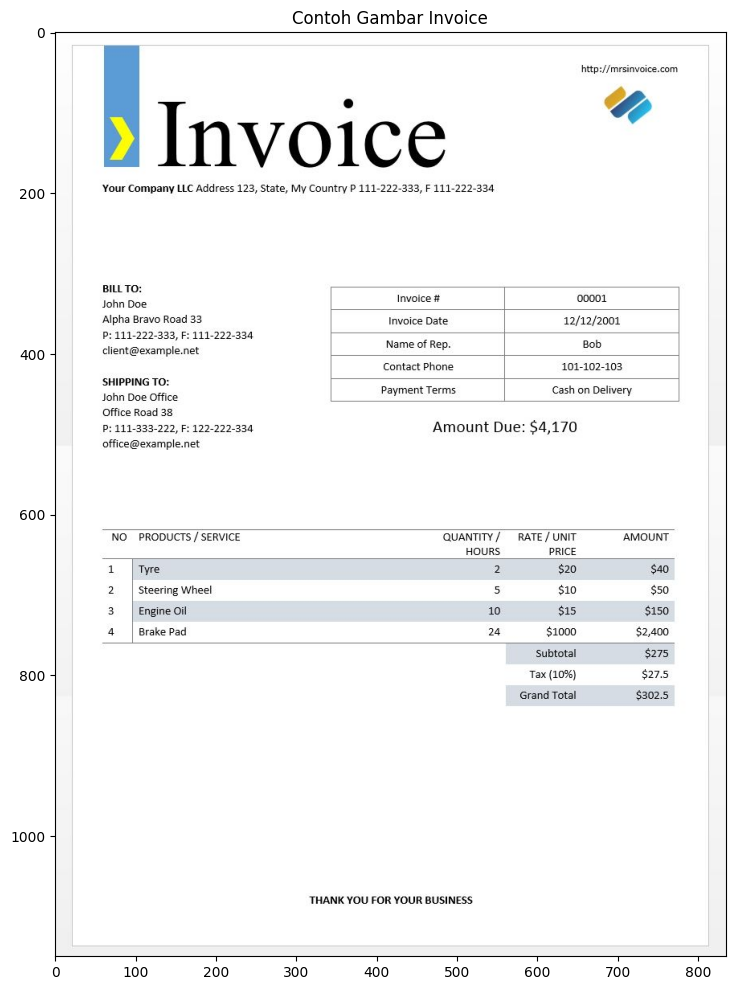

In [2]:
image = cv2.imread('./Dataset/invoice-sample.jpg')

b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('Contoh Gambar Invoice')
plt.show()

### Bounding Box

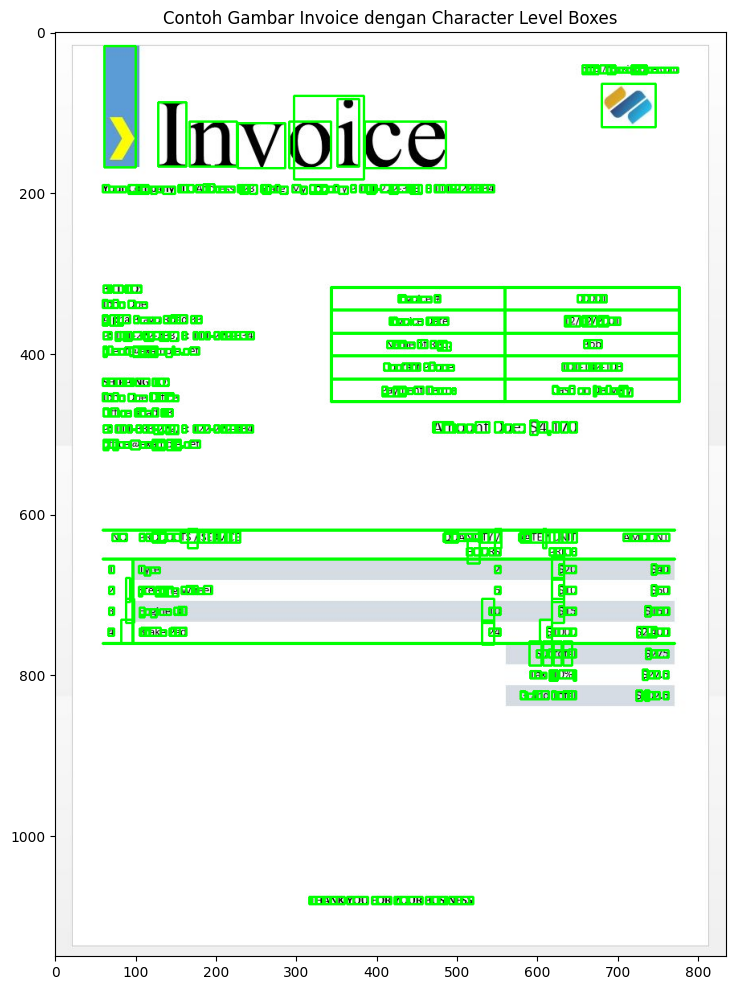

In [3]:
h,w,c = image.shape 
boxes = pytesseract.image_to_boxes(image)

for b in boxes.splitlines():
    b = b.split()
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
    
b,g,r = cv2.split(image)
rgb_img = cv2.merge([r,g,b])

plt.figure(figsize=(16,12))
plt.imshow(rgb_img)
plt.title('Contoh Gambar Invoice dengan Character Level Boxes')
plt.show()

In [4]:
image = cv2.imread('./Dataset/invoice-sample.jpg')
d = pytesseract.image_to_data(image, output_type=Output.DICT)
print('Data Keys: \n',d.keys())

Data Keys: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


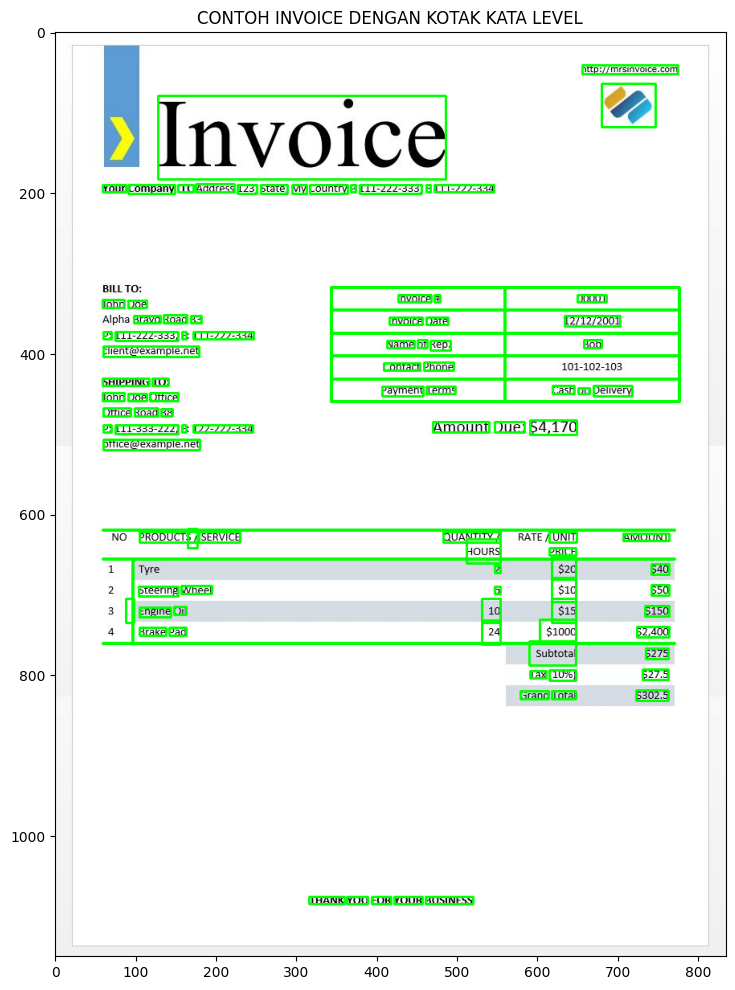

In [5]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    # Kondisi untuk hanya memilih kotak dengan kepercayaan > 60%
    if int(d['conf'][i]) > 60:
        # Mendapatkan koordinat dan ukuran kotak kata
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Membuat kotak pada gambar untuk kata dengan kepercayaan > 60%
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak kata berdasarkan kepercayaan > 60%
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH INVOICE DENGAN KOTAK KATA LEVEL')
plt.show()